Laden Sie den scikit-learn Diabetes Datensatz.
### Teilaufgabe 1
Berechnen Sie für alle Paare von Spalten die Pearson-Korrelation.

In [17]:
from sklearn.datasets import load_diabetes
import pandas as pd
X, y = load_diabetes(as_frame=True, return_X_y=True)
df = X.join(y)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Teilaufgabe 2
Berechnen Sie für alle Paare von Spalten die Spearman-Korrelation.

In [24]:
df_corr = df.corr(method="spearman")

In [27]:
df_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
sex,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
bmi,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
bp,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
s1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
s2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
s3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
s4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
s5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
s6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


<Axes: >

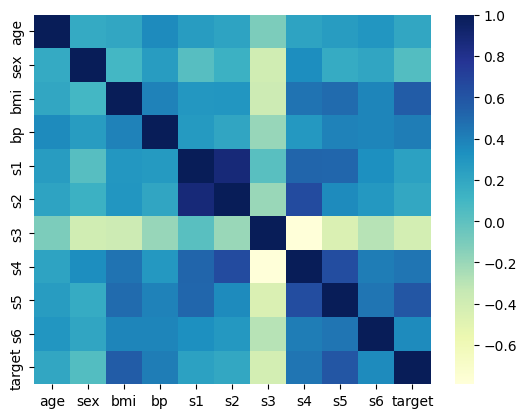

In [32]:
import seaborn as sns
sns.heatmap(df_corr, cmap="YlGnBu")

### Teilaufgabe 3
Berechnen Sie eine lineare Regression zwischen den Spalten "s1" und "s2". Verwenden Sie hierfür [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) von Sklearn.

In [40]:
from sklearn.linear_model import LinearRegression

x = df.loc[:, ["s1"]]
y = df.loc[:, "s2"]

reg = LinearRegression().fit(x, y)

### Teilaufgabe 4
Ermitteln Sie den Steigungskoeffizienten (recherchieren Sie `LinearRegression().coef_`). Finden Sie einen (rechnerischen) Zusammenhang zwischen der Pearson-Korrelation und dem Steigungskoeffizienten?

In [41]:
reg.coef_

array([0.89666296])

Slope formula linear regression: Cov(x,y) / Var(x)

Pearson correlation:  Cov(x,y)/(SD(x)*SD(y))

Beides mal wird die Kovarianz durch eine andere Zahl geteilt. Einmal durch Var(x), ein andermal durch SD(x)*SD(y).

### Teilaufgabe 5
Berechnen Sie den [R²-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) der Vorhersage. Finden Sie einen (rechnerischen) Zusammenhang zwischen der Pearson-Korrelation und dem R²-Score?

In [42]:
from sklearn.metrics import r2_score

y_pred = reg.predict(x)
r2_score(y, y_pred)

0.8040044599094562

In linear least squares multiple regression (with fitted intercept and slope), $`{R^2}`$ equals $`{\displaystyle \rho ^{2}(y,f)}`$ the square of the Pearson correlation coefficient between the observed
$`{\displaystyle y}`$ and modeled (predicted) $`{\displaystyle f}`$ data values of the dependent variable.

Quelle: https://en.wikipedia.org/wiki/Coefficient_of_determination#As_squared_correlation_coefficient